In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import chi2_contingency
from matplotlib import gridspec
import os
import sys
import glob
%matplotlib inline
%precision 4
plt.style.use('ggplot')


In [2]:
df=pd.read_csv('../input/google-playstore-dataset/playstore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,Everyone
...,...,...,...,...,...,...,...,...
1995,Bubble Shooter Space,GAME,4.2,4355,Varies with device,"1,000,000+",Free,Everyone
1996,Swamp Attack,GAME,4.4,2119235,70M,"50,000,000+",Free,Everyone 10+
1997,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,Everyone
1998,Stick War: Legacy,GAME,4.6,811040,77M,"10,000,000+",Free,Teen


In [3]:
df["Rating"]


0       4.1
1       3.9
2       4.7
3       4.5
4       4.3
       ... 
1995    4.2
1996    4.4
1997    4.6
1998    4.6
1999    4.7
Name: Rating, Length: 2000, dtype: float64

In [4]:
df.shape

(2000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             2000 non-null   object 
 1   Category        2000 non-null   object 
 2   Rating          1918 non-null   float64
 3   Reviews         2000 non-null   int64  
 4   Size            2000 non-null   object 
 5   Installs        2000 non-null   object 
 6   Type            2000 non-null   object 
 7   Content Rating  2000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 125.1+ KB


### There are 2000 entries and 8 columns out of which reviews and rating are numeric and other 6 columns are categorial in nature

In [6]:
df.isna().apply(pd.value_counts) 

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
False,2000.0,2000.0,1918,2000.0,2000.0,2000.0,2000.0,2000.0
True,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN


#### There are 82 null values in ratings column

### Handling NULL values

In [7]:
df["Rating"].fillna(df["Rating"].mean(),inplace=True)
df["Rating"]

0       4.1
1       3.9
2       4.7
3       4.5
4       4.3
       ... 
1995    4.2
1996    4.4
1997    4.6
1998    4.6
1999    4.7
Name: Rating, Length: 2000, dtype: float64

In [8]:
df.isna().apply(pd.value_counts) 

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
False,2000,2000,2000,2000,2000,2000,2000,2000


### Replacing null values with average ratings

##  <h1 style="color:Tomato;"> CATEGORY </h1>

In [9]:
df["Category"].unique()


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME'], dtype=object)

In [10]:
df["Category"].nunique()

18

### There are 18 categories in Category column

##  <h1 style="color:Tomato;"> RATING </h1>

In [11]:
print("Range: ", df["Rating"].min(),"-",df["Rating"].max())


Range:  1.0 - 5.0


##  <h1 style="color:Tomato;"> REVIEWS </h1>

#### Checking if all values in number of Reviews numeric

In [12]:
df["Reviews"]

0           159
1           967
2         87510
3        215644
4           967
         ...   
1995       4355
1996    2119235
1997     214878
1998     811040
1999    1536349
Name: Reviews, Length: 2000, dtype: int64

In [13]:
df["Reviews"] = df["Reviews"].astype(int)
df["Reviews"] 

0           159
1           967
2         87510
3        215644
4           967
         ...   
1995       4355
1996    2119235
1997     214878
1998     811040
1999    1536349
Name: Reviews, Length: 2000, dtype: int64

Text(0, 0.5, 'Frequency')

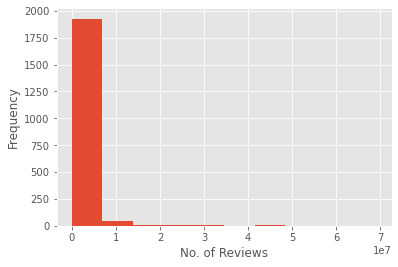

In [14]:
df.Reviews.hist();
plt.xlabel('No. of Reviews')
plt.ylabel('Frequency')

## <h1 style="color:Tomato;"> SIZE </h1>

In [15]:
df.Size.value_counts().head()

Varies with device    502
19M                    45
11M                    43
21M                    39
15M                    38
Name: Size, dtype: int64

### It can be seen that data has metric prefixes (Kilo and Mega) along with another string. Replacing M with their values to convert values to numeric.

In [16]:
df.Size=df.Size.str.replace('M','e+6')
df.Size.head()

0     19e+6
1     14e+6
2    8.7e+6
3     25e+6
4    2.8e+6
Name: Size, dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             2000 non-null   object 
 1   Category        2000 non-null   object 
 2   Rating          2000 non-null   float64
 3   Reviews         2000 non-null   int64  
 4   Size            2000 non-null   object 
 5   Installs        2000 non-null   object 
 6   Type            2000 non-null   object 
 7   Content Rating  2000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 125.1+ KB


### Now, we have some two types of values in our Size data.

Exponential values (not yet converted to string)
Strings (that cannot be converted into numeric)
Thus specifing categories 1 and 2 as an boolean array temp, to convert category 1 to numeric.

In [18]:
def is_convertable(v):
    try:
        float(v)
        return True
    except ValueError:
        return False
    
temp=df.Size.apply(lambda x: is_convertable(x))
temp.head()

0    True
1    True
2    True
3    True
4    True
Name: Size, dtype: bool

Now checking unique non numeric values (~temp) in Size.

In [19]:
df.Size[~temp].value_counts()

Varies with device    502
201k                    1
624k                    1
526k                    1
41k                     1
18k                     1
695k                    1
79k                     1
292k                    1
334k                    1
8.5k                    1
23k                     1
118k                    1
556k                    1
232k                    1
11k                     1
Name: Size, dtype: int64

Replacing 'Varies with Device' by nan 

In [20]:
df.Size=df.Size.replace('Varies with device',np.nan)

Converting the cleaned Size data to numeric type

## <h1 style="color:Tomato;"> INSTALLS </h1>

In [21]:
df.Installs.value_counts()

1,000,000+        471
10,000,000+       358
100,000+          266
5,000,000+        216
500,000+          159
100,000,000+      144
10,000+            89
50,000,000+        71
50,000+            67
1,000+             29
500,000,000+       28
100+               26
5,000+             21
1,000,000,000+     20
500+               16
10+                10
50+                 6
1+                  2
5+                  1
Name: Installs, dtype: int64

It can be seen that there are 22 unique values, out of which

1 is 0,
1 is Free(string) , which we will be converting to nan here
and rest are numeric but with '+' and ',' which shall be removed to convert these into numeric type.

In [22]:
df.Installs=df.Installs.apply(lambda x: x.strip('+'))
df.Installs=df.Installs.apply(lambda x: x.replace(',',''))
df.Installs=df.Installs.replace('Free',np.nan)
df.Installs.value_counts()

1000000       471
10000000      358
100000        266
5000000       216
500000        159
100000000     144
10000          89
50000000       71
50000          67
1000           29
500000000      28
100            26
5000           21
1000000000     20
500            16
10             10
50              6
1               2
5               1
Name: Installs, dtype: int64

Checking if data is converted to numeric

In [23]:
df.Installs.str.isnumeric().sum()

2000

## <h1 style="color:Tomato;"> TYPE </h1>

In [24]:
df.Type.value_counts()

Free    1967
Paid      33
Name: Type, dtype: int64

There are only two types, free and paid. No unwanted data here.

## <h1 style="color:Tomato;"> CONTENT RATING </h1>

In [25]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+'], dtype=object)

In [26]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Content Rating     object
dtype: object

In [27]:
df.isna().sum()

App                 0
Category            0
Rating              0
Reviews             0
Size              502
Installs            0
Type                0
Content Rating      0
dtype: int64

In [28]:
df.dropna(inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1498 entries, 0 to 1998
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1498 non-null   object 
 1   Category        1498 non-null   object 
 2   Rating          1498 non-null   float64
 3   Reviews         1498 non-null   int64  
 4   Size            1498 non-null   object 
 5   Installs        1498 non-null   object 
 6   Type            1498 non-null   object 
 7   Content Rating  1498 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 105.3+ KB


# Descriptive Statistics

In [30]:
df_num=df.select_dtypes(include=np.number)
df_cat=df.select_dtypes(include='object')

In [31]:
df_num.head(5)

,Rating,Reviews
0,4.1,159
1,3.9,967
2,4.7,87510
3,4.5,215644
4,4.3,967


In [32]:
df_cat.head(5)

,App,Category,Size,Installs,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,19e+6,10000,Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,14e+6,500000,Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,8.7e+6,5000000,Free,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,25e+6,50000000,Free,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,2.8e+6,100000,Free,Everyone


NOTE:-

1)Numerical Columns: Ratings,Reviews,Size,Installs

2)Categorical Columns: App,Category,Type,Content Rating

# Mean

In [33]:
df.mean()

Rating      4.286053e+00
Reviews     7.965442e+05
Installs             inf
dtype: float64

# Trimmed Mean

In [34]:
import scipy 
from scipy.stats import stats

In [35]:
scipy.stats.trim_mean(df['Rating'],proportiontocut=0.1)

4.3306728362878

In [36]:
scipy.stats.trim_mean(df['Reviews'],proportiontocut=0.1)

75142.61083333334

In [37]:
# We can say that Installs are having outliers

# Median

In [38]:
df.median()

Rating            4.3
Reviews       15180.0
Installs    1000000.0
dtype: float64

### The above values show the median for all the variables. These values divide the observations into two halves implying that there are exactly 50% of observations above this point and 50% below.


### For instance, consider the Installs , there are 50% of installs below 1000000  and 50% of installs below 1000000

# Mode

In [39]:
df.mode()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
0,8 Ball Pool,GAME,4.5,0.0,19e+6,1000000,Free,Everyone
1,Candy Crush Saga,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_cat.mode()

,App,Category,Size,Installs,Type,Content Rating
0,8 Ball Pool,GAME,19e+6,1000000,Free,Everyone
1,Candy Crush Saga,NaN,NaN,NaN,NaN,NaN


In [41]:
df_cat.describe()

,App,Category,Size,Installs,Type,Content Rating
count,1498,1498,1498,1498,1498,1498
unique,1218,18,192,19,2,5
top,8 Ball Pool,GAME,19e+6,1000000,Free,Everyone
freq,6,278,45,360,1473,1040


We can conclude that 8 ball pool is the most installed app in the app store

Mean:  4.286053006372069 
Median:  4.3 
Mode:  4.5


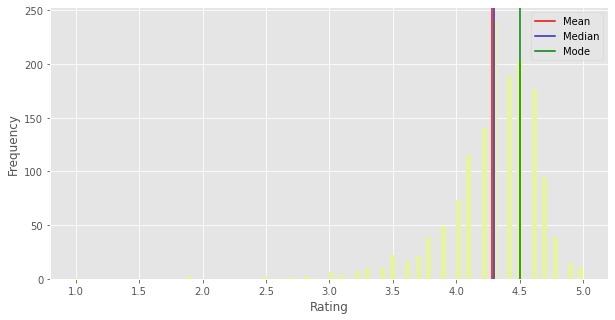

In [42]:
mean1=df['Rating'].mean()
median1=df['Rating'].median()
mode1=df['Rating'].mode()

print('Mean: ',mean1,'\nMedian: ',median1,'\nMode: ',mode1[0])
plt.figure(figsize=(10,5))
plt.hist(df['Rating'],bins=100,color='#e6f49f')
plt.axvline(mean1,color='#ed0909',label='Mean')
plt.axvline(median1,color='#2a22c9',label='Median')
plt.axvline(mode1[0],color='green',label='Mode')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Mean:  796544.1575433912 
Median:  15180.0 
Mode:  0


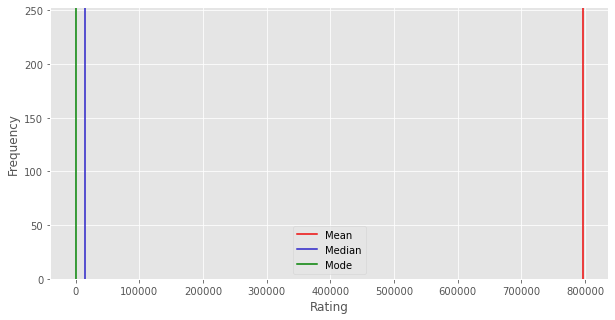

In [43]:
mean2=df['Reviews'].mean()
median2=df['Reviews'].median()
mode2=df['Reviews'].mode()

print('Mean: ',mean2,'\nMedian: ',median2,'\nMode: ',mode2[0])
plt.figure(figsize=(10,5))
plt.hist(df['Rating'],bins=100,color='#e6f49f')
plt.axvline(mean2,color='#ed0909',label='Mean')
plt.axvline(median2,color='#2a22c9',label='Median')
plt.axvline(mode2[0],color='green',label='Mode')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Mean:  inf 
Median:  1000000.0 
Mode:  1000000


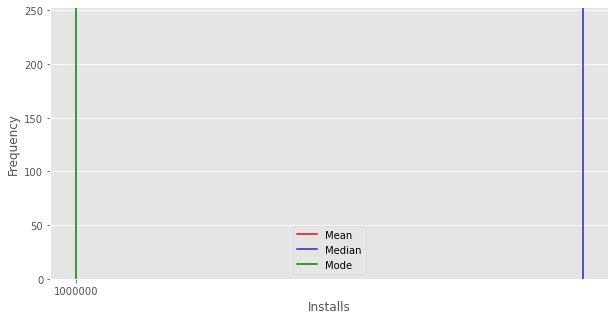

In [44]:
mean4=df['Installs'].mean()
median4=df['Installs'].median()
mode4=df['Installs'].mode()

print('Mean: ',mean4,'\nMedian: ',median4,'\nMode: ',mode4[0])
plt.figure(figsize=(10,5))
plt.hist(df['Rating'],bins=100,color='#e6f49f')
plt.axvline(mean4,color='#ed0909',label='Mean')
plt.axvline(median4,color='#2a22c9',label='Median')
plt.axvline(mode4[0],color='green',label='Mode')
plt.xlabel('Installs')
plt.ylabel('Frequency')
plt.legend()
plt.show()

We can say that Size and Installs follow symmetric distrubution as median=mode

# Quantiles

In [45]:
Q1=df.quantile(0.25)
Q1

Rating        4.10
Reviews    1440.75
Name: 0.25, dtype: float64

In [46]:
Q2=df.quantile(0.5)
Q2

Rating         4.3
Reviews    15180.0
Name: 0.5, dtype: float64

In [47]:
Q3=df.quantile(0.75)
Q3

Rating          4.50
Reviews    122570.75
Name: 0.75, dtype: float64

Q1= 4.1
Q2= 4.3
Q3= 4.5


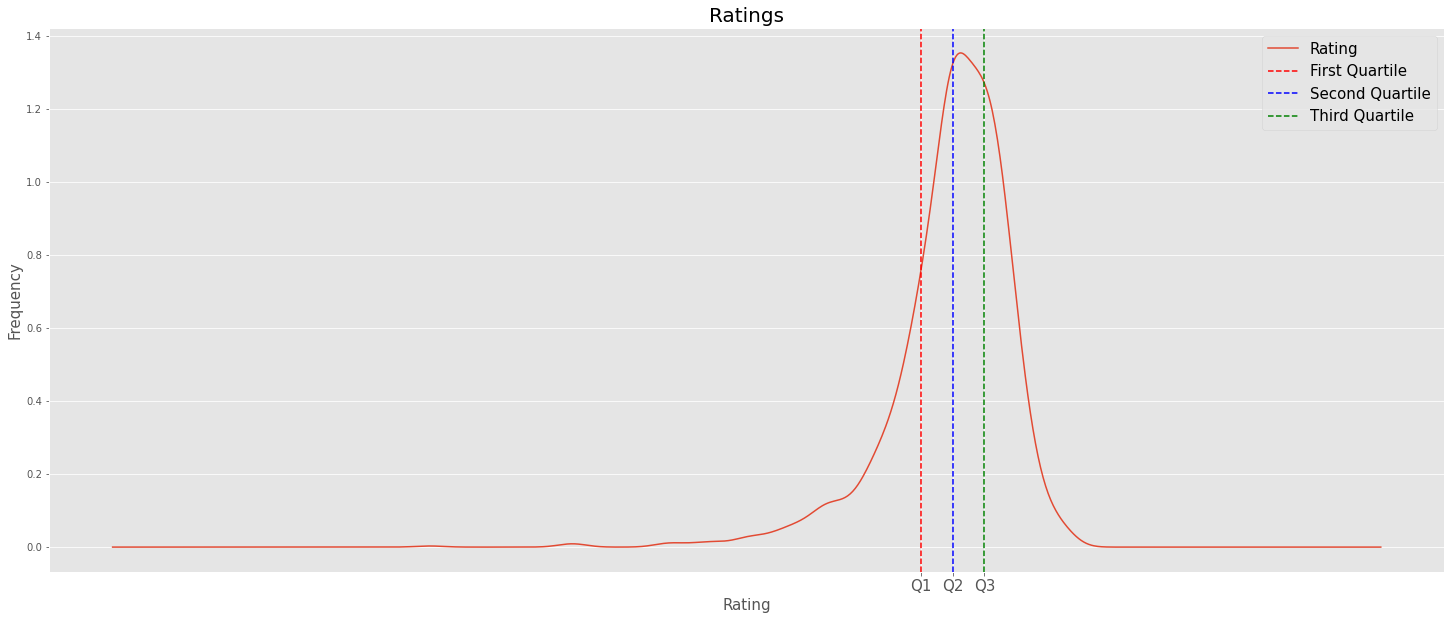

In [48]:
# import the library matplotlib.pyplot 
import matplotlib.pyplot as plt

# using the below code line, matplotlib graphs are included in the python notebook
%matplotlib inline

# set the plot size
plt.rcParams["figure.figsize"] = [25,10]

# compute the quartiles
q1 = df.Rating.quantile(q=0.25)   # compute the first quartile
q2 = df.Rating.quantile(q=0.50)   # compute the second quartile
q3 = df.Rating.quantile(q=0.75)   # compute the third quartile
print('Q1=',q1)
print('Q2=',q2)
print('Q3=',q3)
# plot the density plot the density plot
df.Rating.plot(kind='density') 

# to plot the quartile lines
# plt.axvline(): plots a line perpendicular to the X-axis at specified location on X-axis
# x: location on X-axis at which the line is to be plotted
# ymax: specify the height of the line
# color: color of the line
# linestyle: specify the style of the line 
# label: the name of the line. This name is displayed in the legend
plt.axvline(x = q1, color='red', linestyle='--', label ="First Quartile")     # plot the first quartile
plt.axvline(x = q2, color='blue', linestyle='--', label ="Second Quartile")   # plot the second quartile
plt.axvline(x = q3, color='green', linestyle='--', label ="Third Quartile")   # plot the third quartile
# loc: specify the location of the legend
# fontsize: set the font size of the legends
plt.legend(loc="best", fontsize= 15)

# to display the plot title using plt.title()
# fontsize: set the font size of the title
plt.title("Ratings", fontsize = 20)

# to label the X-axis using plt.xlabel()
# fontsize: set the font size of the label
plt.xlabel("Rating", fontsize = 15)

# to label the Y-axis
# fontsize: set the font size of the label
plt.ylabel("Frequency", fontsize = 15)


# label the X-axis at the points where we draw the perpendicular lines using plt.xticks()
# locs: specify the location on X-axis
# labels: specify the labels on X-axis
# fontsize: set the font size of the ticks
locs,labels = [q1,q2,q3],["Q1","Q2","Q3"]           # get locations and labels
plt.xticks(locs, labels, fontsize = 15 )            # set locations and labels

# to display the figure
plt.show()

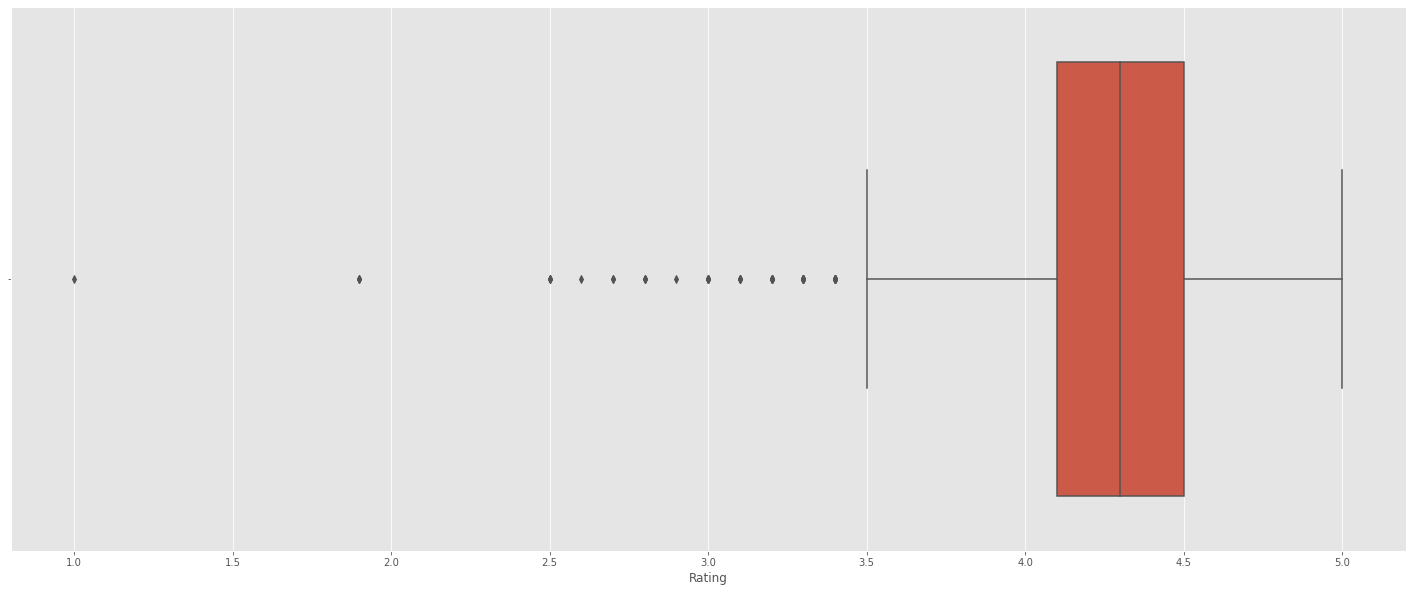

In [49]:
sns.boxplot(df.Rating)

Q1= 1440.75
Q2= 15180.0
Q3= 122570.75


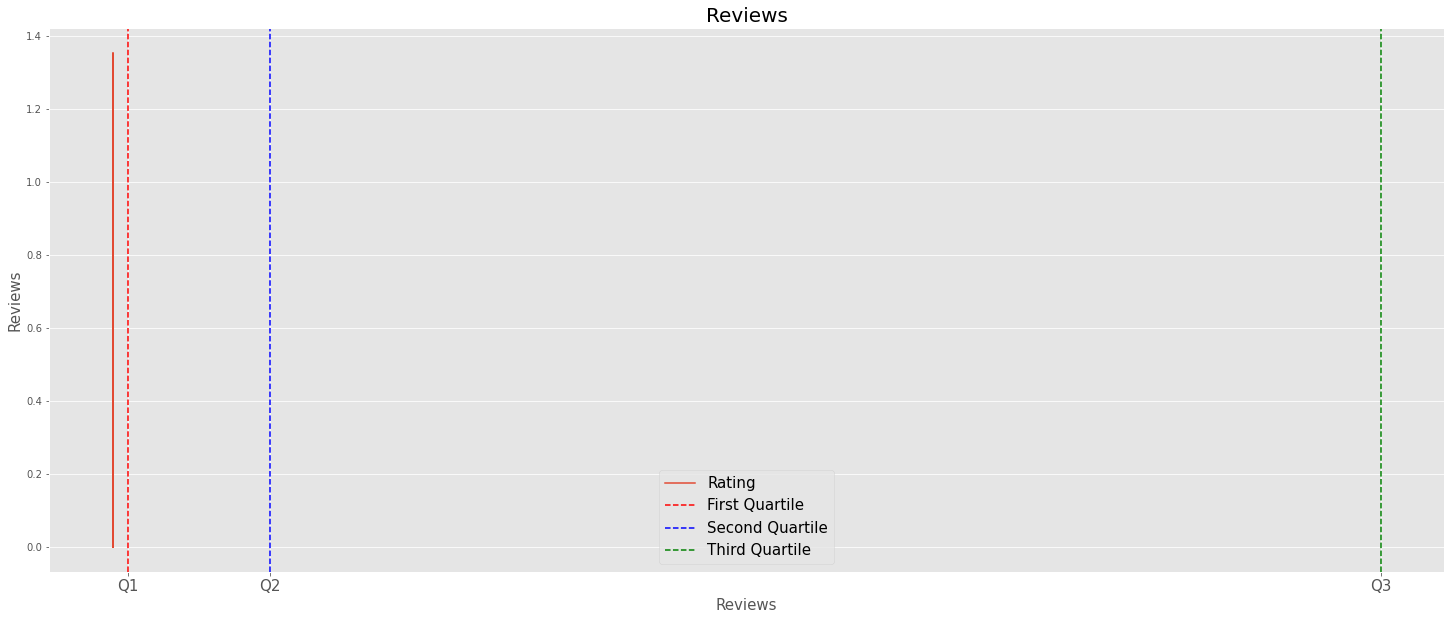

In [50]:
# import the library matplotlib.pyplot 
import matplotlib.pyplot as plt

# using the below code line, matplotlib graphs are included in the python notebook
%matplotlib inline

# set the plot size
plt.rcParams["figure.figsize"] = [25,10]

# compute the quartiles
q11 = df.Reviews.quantile(q=0.25)   # compute the first quartile
q21 = df.Reviews.quantile(q=0.50)   # compute the second quartile
q31 = df.Reviews.quantile(q=0.75)   # compute the third quartile
print('Q1=',q11)
print('Q2=',q21)
print('Q3=',q31)
# plot the density plot the density plot
df.Rating.plot(kind='density') 

# to plot the quartile lines
# plt.axvline(): plots a line perpendicular to the X-axis at specified location on X-axis
# x: location on X-axis at which the line is to be plotted
# ymax: specify the height of the line
# color: color of the line
# linestyle: specify the style of the line 
# label: the name of the line. This name is displayed in the legend
plt.axvline(x = q11, color='red', linestyle='--', label ="First Quartile")     # plot the first quartile
plt.axvline(x = q21, color='blue', linestyle='--', label ="Second Quartile")   # plot the second quartile
plt.axvline(x = q31, color='green', linestyle='--', label ="Third Quartile")   # plot the third quartile
# loc: specify the location of the legend
# fontsize: set the font size of the legends
plt.legend(loc="best", fontsize= 15)

# to display the plot title using plt.title()
# fontsize: set the font size of the title
plt.title("Reviews", fontsize = 20)

# to label the X-axis using plt.xlabel()
# fontsize: set the font size of the label
plt.xlabel("Reviews", fontsize = 15)

# to label the Y-axis
# fontsize: set the font size of the label
plt.ylabel("Reviews", fontsize = 15)


# label the X-axis at the points where we draw the perpendicular lines using plt.xticks()
# locs: specify the location on X-axis
# labels: specify the labels on X-axis
# fontsize: set the font size of the ticks
locs,labels = [q11,q21,q31],["Q1","Q2","Q3"]           # get locations and labels
plt.xticks(locs, labels, fontsize = 15 )            # set locations and labels

# to display the figure
plt.show()

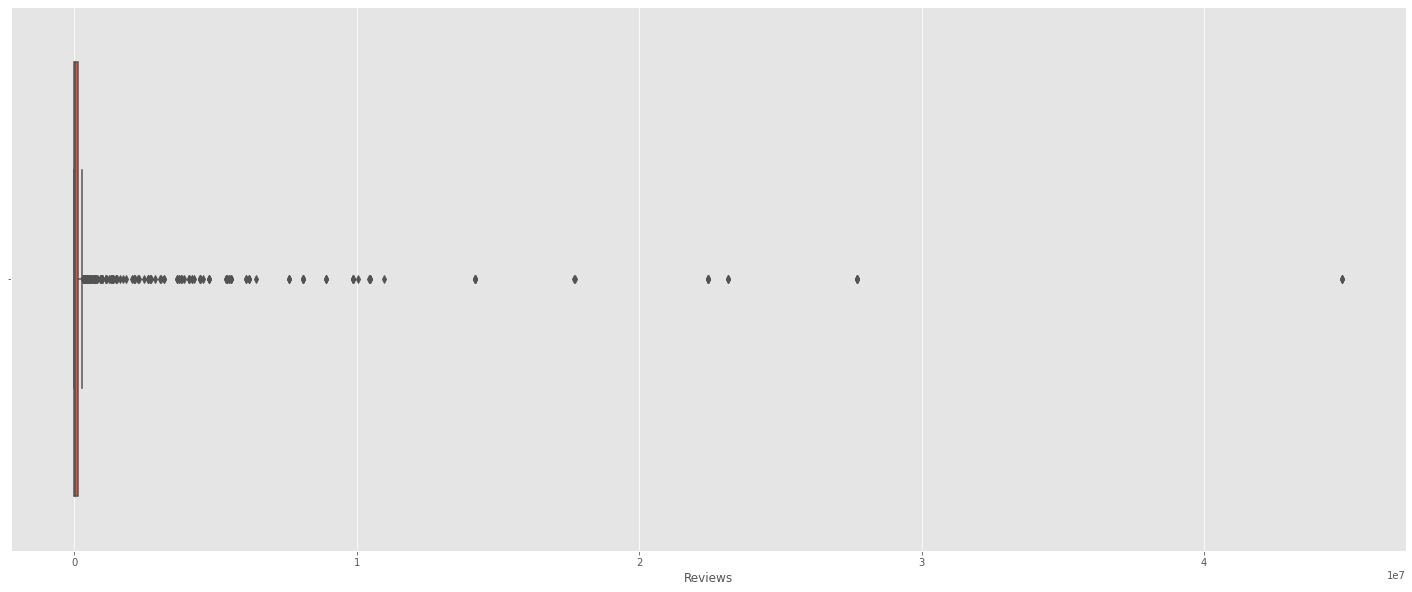

In [51]:
sns.boxplot(df.Reviews)

# Range

In [52]:
r=df_num.max()-df_num.min()
r

Rating            4.0
Reviews    44893888.0
dtype: float64

## Range for Reviews,Size and Installs is more so we can say that it is affected by outliers

# IQR

In [53]:
iqr=df.quantile(0.75)-df.quantile(0.25)
iqr

Rating          0.4
Reviews    121130.0
dtype: float64

## Range for Reviews,Size and Installs is more in the middle half of the dataset

# Coefficient of Variation

In [54]:
from scipy.stats import variation
scipy.stats.variation(df_num)

array([0.0893, 4.4133])

## We can say that coefficent of variation for Reviews and Rating is more

# Standard Deviation

In [55]:
df.std()

Rating     3.828439e-01
Reviews    3.516532e+06
dtype: float64

# Reviews is having a significant higher standard deviation

# Understanding the Distrubution of the data

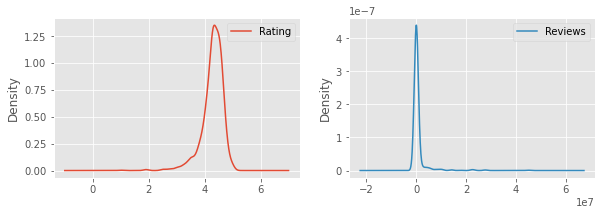

In [56]:
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

# Skewness and Kurtosis

In [57]:
df.skew()

Rating     -1.993549
Reviews     7.529682
Installs    8.133277
dtype: float64

# Rating is seem to be Rating is negatively skewed and reviews is right skewed

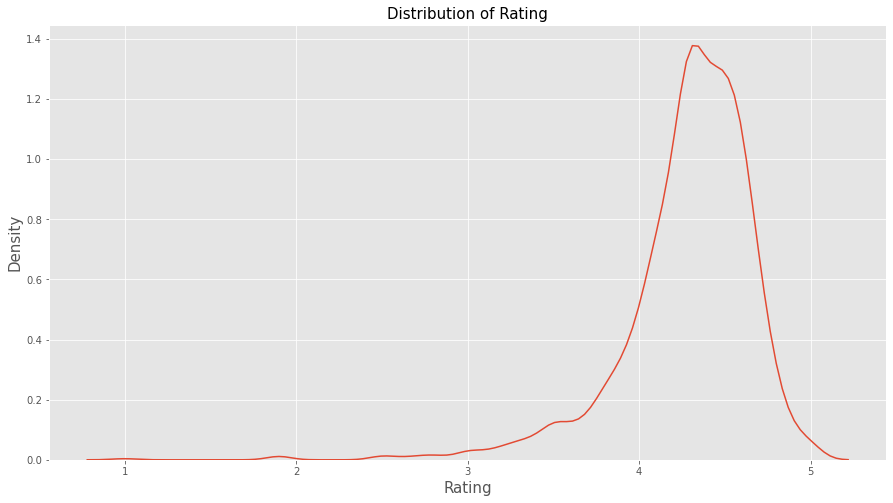

In [58]:
plt.figure(figsize=(15,8))
sns.distplot(a = df['Rating'], hist = False)

# plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Rating', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.title('Distribution of Rating', fontsize = 15)

# display the plot
plt.show()

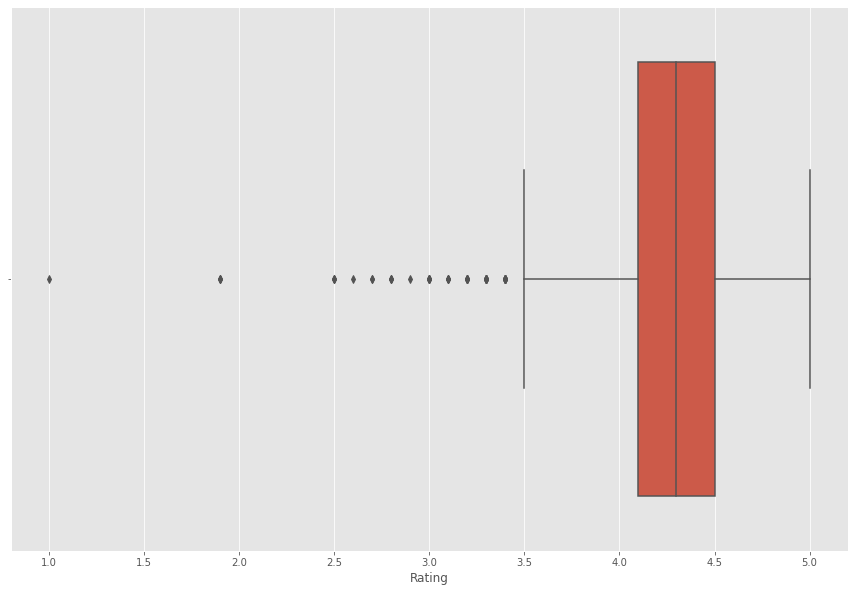

In [59]:
sns.boxplot(df.Rating)

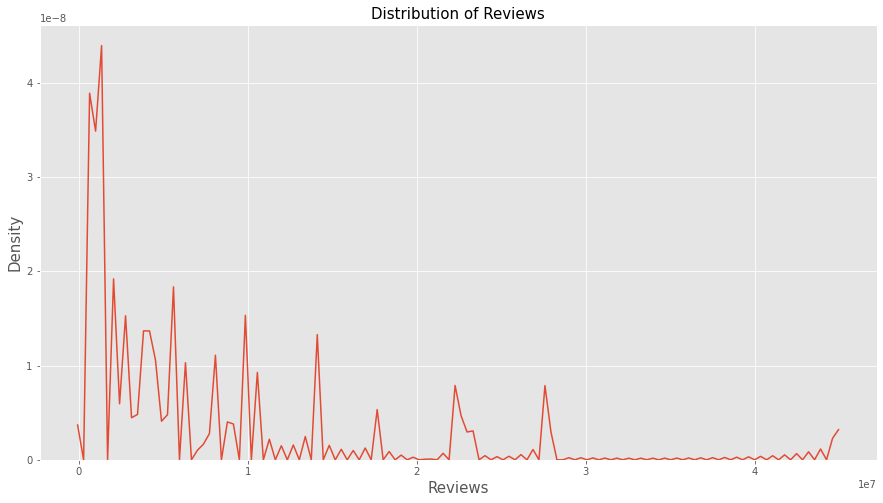

In [60]:
plt.figure(figsize=(15,8))
sns.distplot(a = df['Reviews'], hist = False)

# plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Reviews', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.title('Distribution of Reviews', fontsize = 15)

# display the plot
plt.show()

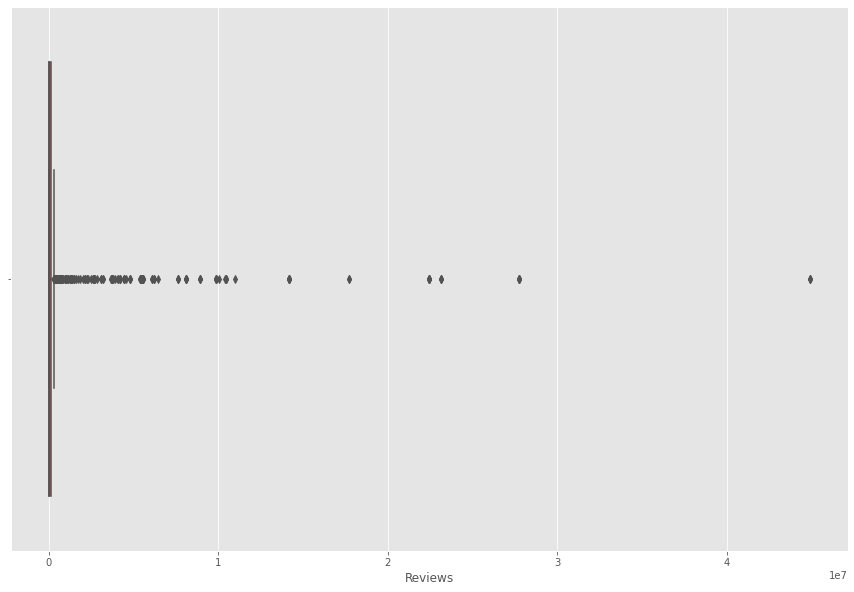

In [61]:
sns.boxplot(df.Reviews)

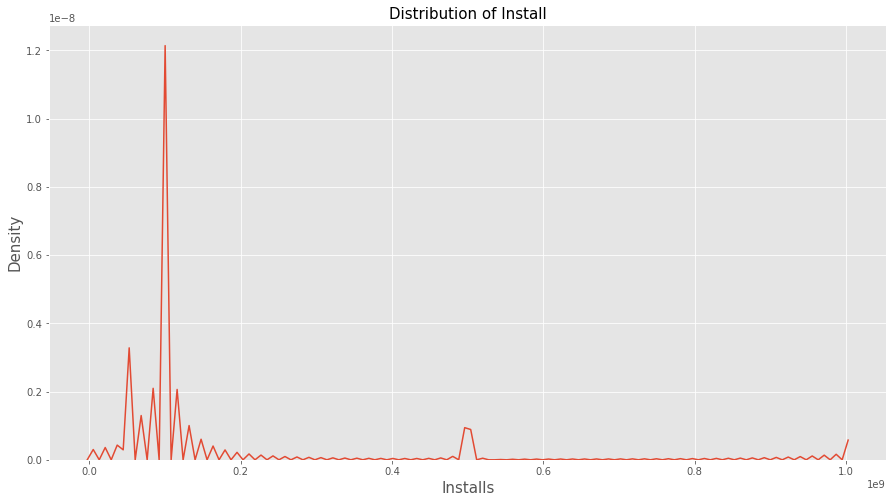

In [62]:
plt.figure(figsize=(15,8))
sns.distplot(a = df['Installs'], hist = False)

# plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Installs', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.title('Distribution of Install', fontsize = 15)

# display the plot
plt.show()

# Variance

In [63]:
var=df.var()
var

Rating     1.465694e-01
Reviews    1.236600e+13
dtype: float64

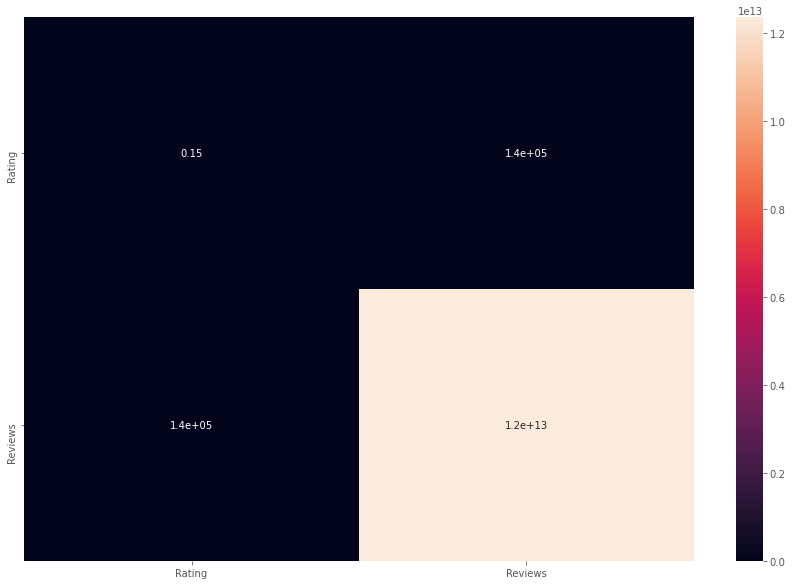

In [64]:
sns.heatmap(df.cov(),annot=True)

# Coorelation

In [65]:
corr=df.corr()
corr

,Rating,Reviews
Rating,1.000000,0.107024
Reviews,0.107024,1.000000


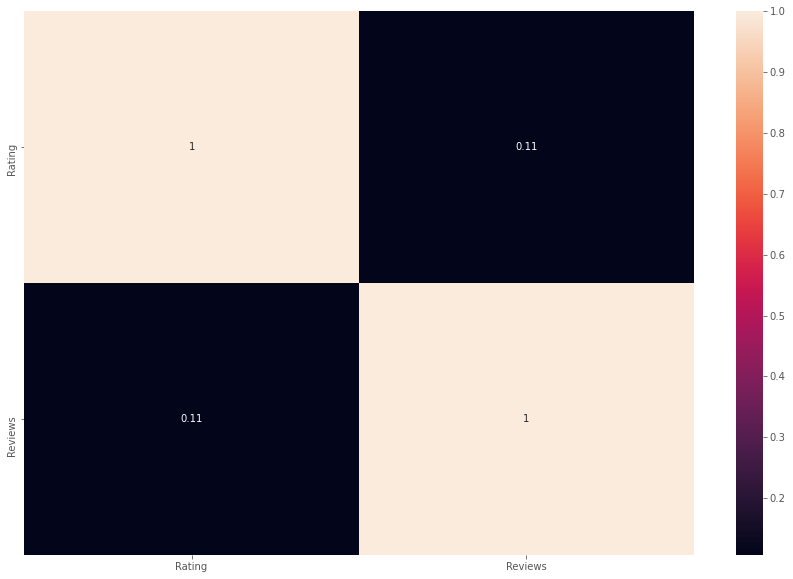

In [66]:
sns.heatmap(df.corr(),annot=True)


Lets formulate our hypothesis to answer this question.

##### Null Hypothesis ($H_0$)
    The type of app has no significant impact on the average ratings.

##### Alternative Hypothesis ($H_A$)
    The type of app has significant impact on the average ratings.
    


In [67]:
df["Type"].value_counts()

Free    1473
Paid      25
Name: Type, dtype: int64

Text(0.5, 1.0, 'Number of Free Apps vs Paid Apps')

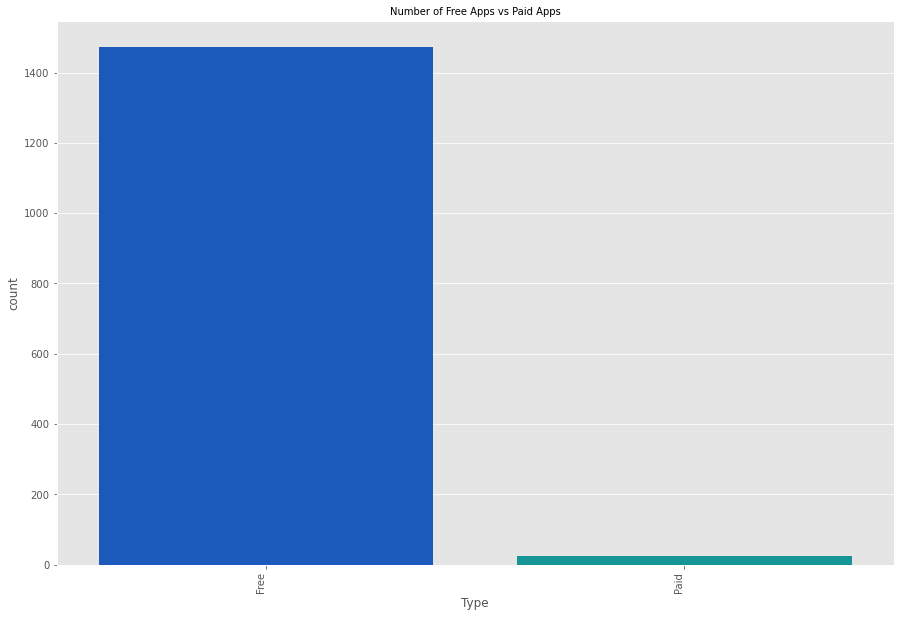

In [68]:
type_plot = sns.countplot(x="Type", data=df, palette = "winter")
type_plot.set_xticklabels(type_plot.get_xticklabels(), rotation=90, ha="right")
type_plot 
plt.title('Number of Free Apps vs Paid Apps',size = 10)

In [69]:
sample=df.groupby('Type').apply(lambda x:x.sample(8,random_state=4))
len(sample)

16

CHECKING TO PERFORM TWO-SAMPLE T-TEST (INDEPENDENT)

#### SHAPIRO TEST TO CHECK FOR NORMALITY

In [70]:
import scipy.stats as stats
stat, p_value = stats.shapiro(sample["Rating"])

# print the p-value 
print('P-Value:', p_value)
print("pval > 0.05 Therefore Ratings are normally distributed")


P-Value: 0.44745707511901855
pval > 0.05 Therefore Ratings are normally distributed


In [71]:
free1 = sample[(sample['Type'] == 'Free')]
paid1 = sample[(sample['Type'] == 'Paid')]


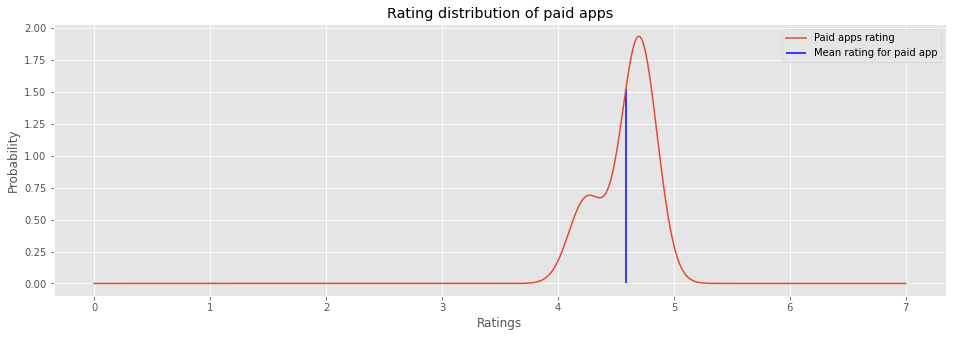

In [72]:
all_app_ratings = np.array(df['Rating'])
paid_app_rating_kde = stats.gaussian_kde(paid1['Rating'])
ratings = np.linspace(0, 7, 1000)
plt.figure(figsize=(16,5))
plt.plot(ratings, paid_app_rating_kde(ratings), label="Paid apps rating")
mean_paid_app_rating = np.mean(paid1['Rating'])
prob_mean_paid_app_rating = paid_app_rating_kde(mean_paid_app_rating)[0]
plt.vlines(x=mean_paid_app_rating, ymin=0, ymax=prob_mean_paid_app_rating, color='b', label="Mean rating for paid app")

plt.title("Rating distribution of paid apps")
plt.xlabel("Ratings")
plt.ylabel("Probability")
plt.legend()

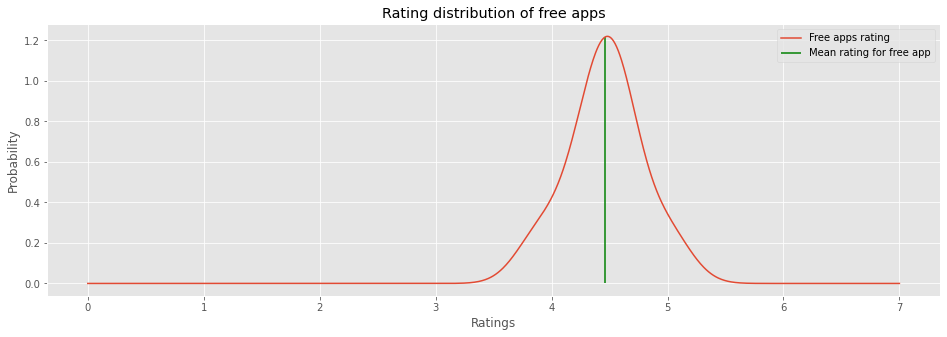

In [73]:
free_app_rating_kde = stats.gaussian_kde(free1['Rating'])
ratings = np.linspace(0, 7, 1000)
plt.figure(figsize=(16,5))
plt.plot(ratings, free_app_rating_kde(ratings), label="Free apps rating")
mean_free_app_rating = np.mean(free1['Rating'])
prob_mean_free_app_rating = free_app_rating_kde(mean_free_app_rating)[0]
plt.vlines(x=mean_free_app_rating, ymin=0, ymax=prob_mean_free_app_rating, color='g', label="Mean rating for free app")
plt.title("Rating distribution of free apps")
plt.xlabel("Ratings")
plt.ylabel("Probability")
plt.legend()

In [74]:
free = sample[(sample['Type'] == 'Free')]["Rating"]
len(free)
paid = sample[(sample['Type'] == 'Paid')]["Rating"]
len(paid)

8

#### LEVENE TEST TO ASSESS THE VARIANCES

In [75]:
stat, p_value = stats.levene(free,paid)
print('P-Value:', p_value)
print("From the above result, we can see that the p-value is greater than 0.05, thus we can say that the population variances are equal.")

P-Value: 0.49172699214439053
From the above result, we can see that the p-value is greater than 0.05, thus we can say that the population variances are equal.


#### TWO SAMPLE T-TEST

In [76]:
test_stat, p_value = stats.ttest_ind(a = free, b = paid)
print('p-value:', p_value)
print("p-value is > 0.05 , thus we accept H0 and conclude that the type of app doesnt affect the ratings")


p-value: 0.373475796257156
p-value is > 0.05 , thus we accept H0 and conclude that the type of app doesnt affect the ratings


### MANWHITNEY U TEST

## Free apps and paid apps have same number of installs ?
Lets formulate our hypothesis to answer this question.

##### Null Hypothesis ($H_0$)
    The average installs for free and paid apps is same

##### Alternative Hypothesis ($H_A$)
    The average installs for free and paid apps is not same

In [77]:
sample=df.groupby('Type').apply(lambda x:x.sample(12,random_state=5))
len(sample)

24

In [78]:
free = sample[(sample['Type'] == 'Free')]["Installs"]
len(free)
paid = sample[(sample['Type'] == 'Paid')]["Installs"]
len(paid)

12

In [79]:
stat, p_value = stats.shapiro(sample["Installs"])

# print the p-value 
print('P-Value:', p_value)
print("pval < 0.05 Therefore Ratings are Not normally distributed")

P-Value: 1.2945519656248905e-10
pval < 0.05 Therefore Ratings are Not normally distributed


In [80]:
stat, p_value = stats.mannwhitneyu(free,paid,alternative="two-sided")
print('P-Value:', p_value)

P-Value: 0.009347252420777245


we reject H0 therefore the avg number of installs for paid and free apps is not the same.

### KRUSKALS TEST


Lets formulate our hypothesis to answer this question.

##### Null Hypothesis ($H_0$)
   Avg rating is same for all the categories of apps 
##### Alternative Hypothesis ($H_A$)
   Avg rating for atleast one category is not the same


In [81]:
sample=df.groupby('Category').apply(lambda x:x.sample(32,random_state=40))
print("sample size(n):",len(sample))

sample size(n): 576


In [82]:
df.Category.value_counts()

GAME                   278
DATING                 205
HEALTH_AND_FITNESS     125
EDUCATION              111
ENTERTAINMENT           90
FINANCE                 87
LIFESTYLE               77
BUSINESS                72
COMMUNICATION           69
FOOD_AND_DRINK          56
HOUSE_AND_HOME          52
ART_AND_DESIGN          47
LIBRARIES_AND_DEMO      45
AUTO_AND_VEHICLES       41
EVENTS                  39
BEAUTY                  36
BOOKS_AND_REFERENCE     35
COMICS                  33
Name: Category, dtype: int64

In [83]:
Cat=sample.Category.unique()
type(Cat)
mylist=list(Cat)
type(mylist)
mylist

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'GAME',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE']

In [84]:
for item in mylist:
    myd=sample[sample['Category']==item]['Rating']
    test,p_val=stats.shapiro(myd)
    print(item,' : ',p_val)

ART_AND_DESIGN  :  0.016711384057998657
AUTO_AND_VEHICLES  :  0.1861790269613266
BEAUTY  :  0.5143148303031921
BOOKS_AND_REFERENCE  :  0.0006812965730205178
BUSINESS  :  0.8223279714584351
COMICS  :  0.0014248091029003263
COMMUNICATION  :  0.05174439400434494
DATING  :  0.0008642252651043236
EDUCATION  :  0.06818848848342896
ENTERTAINMENT  :  0.08955409377813339
EVENTS  :  0.04531426727771759
FINANCE  :  0.0013455331791192293
FOOD_AND_DRINK  :  0.06279417872428894
GAME  :  0.10450655221939087
HEALTH_AND_FITNESS  :  0.004036517348140478
HOUSE_AND_HOME  :  0.08814556151628494
LIBRARIES_AND_DEMO  :  0.0009444536408409476
LIFESTYLE  :  0.003152424469590187


In [85]:
plt.rcParams["figure.figsize"] = [25,25]

# divide the plot into the specified number of subplots 
gs = gridspec.GridSpec(4, 5, width_ratios=[3, 3, 3, 3, 3], height_ratios=[1, 1, 1, 1])

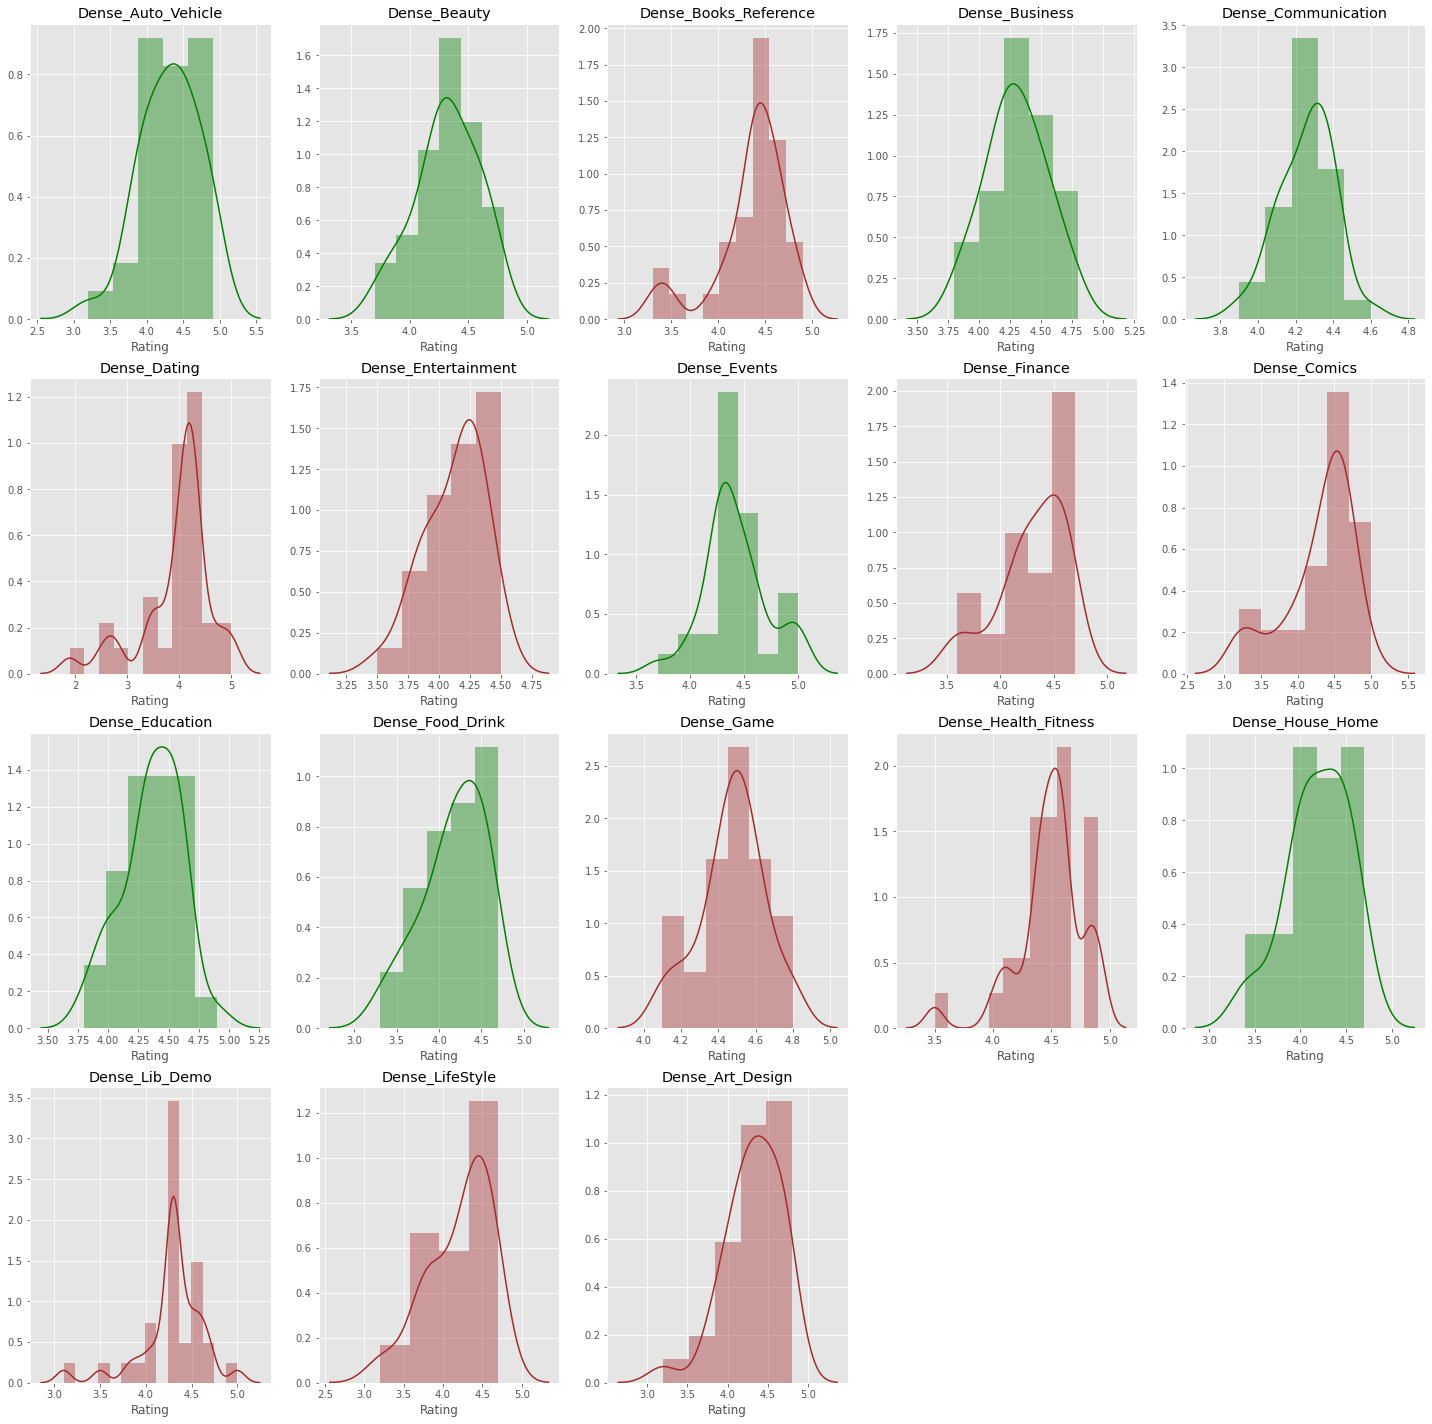

In [86]:
#***********************************Plotting for Auto_Vehicles*****************************************************
Auto_Veh=sample[sample['Category']=='AUTO_AND_VEHICLES']['Rating']
plt.subplot(gs[0,0])
plt.title('Dense_Auto_Vehicle')
sns.distplot(Auto_Veh,color='green')  #Normal so green
#***********************************Plotting for Beauty************************************************************
Beauty=sample[sample['Category']=='BEAUTY']['Rating']
plt.subplot(gs[0,1])
plt.title('Dense_Beauty')
sns.distplot(Beauty,color='green')  #Normal so green
#***********************************Plotting for Books_Reference***************************************************
Book_Ref=sample[sample['Category']=='BOOKS_AND_REFERENCE']['Rating']
plt.subplot(gs[0,2])
plt.title('Dense_Books_Reference')
sns.distplot(Book_Ref,color='brown')  #Not normal so brown
#***********************************Plotting for Business**********************************************************
Business=sample[sample['Category']=='BUSINESS']['Rating']
plt.subplot(gs[0,3])
plt.title('Dense_Business')
sns.distplot(Business,color='green')  #Normal so green
#***********************************Plotting for Communication**********************************************************
Comm=sample[sample['Category']=='COMMUNICATION']['Rating']
plt.subplot(gs[0,4])
plt.title('Dense_Communication')
sns.distplot(Comm,color='green')  #Normal so green
#***********************************Plotting for Dating************************************************************
Dating=sample[sample['Category']=='DATING']['Rating']
plt.subplot(gs[1,0])
plt.title('Dense_Dating')
sns.distplot(Dating,color='brown')  #Not normal so brown
#***********************************Plotting for Entertainment************************************************************
Entrtnmnt=sample[sample['Category']=='ENTERTAINMENT']['Rating']
plt.subplot(gs[1,1])
plt.title('Dense_Entertainment')
sns.distplot(Entrtnmnt,color='brown')  #Not normal so brown
#***********************************Plotting for Events************************************************************
Events=sample[sample['Category']=='EVENTS']['Rating']
plt.subplot(gs[1,2])
plt.title('Dense_Events')
sns.distplot(Events,color='green')  #Normal so green
#***********************************Plotting for Finance************************************************************
Fin=sample[sample['Category']=='FINANCE']['Rating']
plt.subplot(gs[1,3])
plt.title('Dense_Finance')
sns.distplot(Fin,color='brown') #Not normal so brown
#***********************************Plotting for Comics************************************************************
Comics=sample[sample['Category']=='COMICS']['Rating']
plt.subplot(gs[1,4])
plt.title('Dense_Comics')
sns.distplot(Comics,color='brown') #Not normal so brown
#***********************************Plotting for Education************************************************************
Edu=sample[sample['Category']=='EDUCATION']['Rating']
plt.subplot(gs[2,0])
plt.title('Dense_Education')
sns.distplot(Edu,color='green')  #Normal so green
#***********************************Plotting for Food_And_Drink************************************************************
Food_Drink=sample[sample['Category']=='FOOD_AND_DRINK']['Rating']
plt.subplot(gs[2,1])
plt.title('Dense_Food_Drink')
sns.distplot(Food_Drink,color='green')  #Normal so green
#***********************************Plotting for Game************************************************************
Game=sample[sample['Category']=='GAME']['Rating']
plt.subplot(gs[2,2])
plt.title('Dense_Game')
sns.distplot(Game,color='brown')  #Not normal so brown
#***********************************Plotting for Health_And_Fitness************************************************************
Health_Fit=sample[sample['Category']=='HEALTH_AND_FITNESS']['Rating']
plt.subplot(gs[2,3])
plt.title('Dense_Health_Fitness')
sns.distplot(Health_Fit,color='brown') #Not normal so brown
#***********************************Plotting for House_Home************************************************************
House_Home=sample[sample['Category']=='HOUSE_AND_HOME']['Rating']
plt.subplot(gs[2,4])
plt.title('Dense_House_Home')
sns.distplot(House_Home,color='green') #Normal so green
#***********************************Plotting for Libraries_And_Demo************************************************************
Lib_Demo=sample[sample['Category']=='LIBRARIES_AND_DEMO']['Rating']
plt.subplot(gs[3,0])
plt.title('Dense_Lib_Demo')
sns.distplot(Lib_Demo,color='brown') #Not normal so brown
#***********************************Plotting for Lifestyle************************************************************
Lifestyle=sample[sample['Category']=='LIFESTYLE']['Rating']
plt.subplot(gs[3,1])
plt.title('Dense_LifeStyle')
sns.distplot(Lifestyle,color='brown') #Not normal so brown
#***********************************Plotting for Art_Design*****************************************************
Art_Design=sample[sample['Category']=='ART_AND_DESIGN']['Rating']
plt.subplot(gs[3,2])
plt.title('Dense_Art_Design')
sns.distplot(Art_Design,color='brown') #Not normal so brown
plt.show()

In [87]:
stats.levene(Art_Design,Auto_Veh,Beauty,Book_Ref,Business,Comm,Dating,Entrtnmnt,Events,Fin,Comics,Edu,Food_Drink,Game,Health_Fit,House_Home,Lib_Demo,Lifestyle)

LeveneResult(statistic=3.467053134014824, pvalue=3.5429092165986464e-06)

As some of the categories are failing to satisfy Shapiro test and levene test is not combinedly satisfied we can not perform ANOVA. So we have to go for non-parametric Kruskal Test.

# KRUSKAL'S TEST

In [88]:
p_val = stats.kruskal(Art_Design,Auto_Veh,Beauty,Book_Ref,Business,Comm,
              Dating,Entrtnmnt,Events,Fin,Comics,Edu,Food_Drink,Game,Health_Fit,
              House_Home,Lib_Demo,Lifestyle)
print("pval :",p_val)
print("Since p_value < 0.05 we reject H0 and thus we conclude that average rating is not the same   for all the category of apps")

pval : KruskalResult(statistic=65.53823987518909, pvalue=1.2462083921037888e-07)
Since p_value < 0.05 we reject H0 and thus we conclude that average rating is not the same   for all the category of apps


In [89]:
df['Content Rating'].value_counts()

Everyone           1040
Mature 17+          208
Teen                179
Everyone 10+         70
Adults only 18+       1
Name: Content Rating, dtype: int64

In [90]:
df[df['Content Rating']=='Adults only 18+']

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4.9e+6,500000,Free,Adults only 18+


In [91]:
df.drop([298], axis=0, inplace=True)

In [92]:
df['Content Rating'].value_counts()

Everyone        1040
Mature 17+       208
Teen             179
Everyone 10+      70
Name: Content Rating, dtype: int64

In [93]:
sample=df.groupby('Content Rating', group_keys=False).apply(lambda x:x.sample(30,random_state=1))
sample.shape

(120, 8)

### CHI-SQUARE TEST

### Is there significant difference between quality of free apps and paid apps?
Lets formulate our hypothesis to answer this question.

##### Null Hypothesis ($H_0$)
    The content rating is independent of application category.

##### Alternative Hypothesis ($H_A$)
    The content rating is dependent of application category.

In [94]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Content Rating    0
dtype: int64

In [95]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [96]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Content Rating'],
      dtype='object')

In [97]:
df['Category'].value_counts()

GAME                   278
DATING                 205
HEALTH_AND_FITNESS     125
EDUCATION              111
ENTERTAINMENT           90
FINANCE                 87
LIFESTYLE               77
BUSINESS                72
COMMUNICATION           69
FOOD_AND_DRINK          56
HOUSE_AND_HOME          52
ART_AND_DESIGN          47
LIBRARIES_AND_DEMO      45
AUTO_AND_VEHICLES       41
EVENTS                  39
BEAUTY                  36
BOOKS_AND_REFERENCE     35
COMICS                  32
Name: Category, dtype: int64

In [98]:
df['Category'].nunique()

18

In [99]:
df['Content Rating'].value_counts()

Everyone        1040
Mature 17+       208
Teen             179
Everyone 10+      70
Name: Content Rating, dtype: int64

In [100]:
df['Content Rating'].value_counts()

Everyone        1040
Mature 17+       208
Teen             179
Everyone 10+      70
Name: Content Rating, dtype: int64

In [101]:
## H0 : The content rating is independent of category
## H1 : The content rating is dependent of category

In [102]:
sample=df.groupby('Content Rating', group_keys=False).apply(lambda x:x.sample(30,random_state=1))
sample

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
1433,Brain Waves - Binaural Beats,HEALTH_AND_FITNESS,4.400000,5038,10e+6,500000,Free,Everyone
1027,vide-greniers.org,EVENTS,4.300000,5839,3.5e+6,100000,Free,Everyone
1494,Room Painting Ideas,HOUSE_AND_HOME,4.000000,4450,7.6e+6,1000000,Free,Everyone
1235,OpenTable: Restaurants Near Me,FOOD_AND_DRINK,4.600000,90242,19e+6,5000000,Free,Everyone
96,Inquiry Fines and Debits of Vehicles,AUTO_AND_VEHICLES,4.400000,2680,2.2e+6,500000,Free,Everyone
...,...,...,...,...,...,...,...,...
864,Vigo Lite,ENTERTAINMENT,4.200000,10291,6.5e+6,5000000,Free,Teen
907,Animal Planet GO,ENTERTAINMENT,4.200000,2442,9.6e+6,100000,Free,Teen
945,WWE,ENTERTAINMENT,4.500000,736864,20e+6,10000000,Free,Teen
957,Telemundo Now,ENTERTAINMENT,3.900000,8674,19e+6,1000000,Free,Teen


In [103]:
# for sample
Content = pd.crosstab(sample['Category'], sample['Content Rating'])
stat, pvalue, dof, arr = stats.chi2_contingency(Content)
print("chi-stat :",stat)
print("p-value :",pvalue)

chi-stat : 195.62406015037595
p-value : 8.3021537180809e-19


Since p-value<0.05, we reject Null hypothesis Thus we can conclude that Content Rating and Category of applications are associated with each other

### Is  application Type dependent on Content Rating?
Lets formulate our hypothesis to answer this question.

##### Null Hypothesis ($H_0$)
    The application type is independent of Content Rating.

##### Alternative Hypothesis ($H_A$)
    The application type is dependent of Content Rating.

In [104]:
sample2 = df.groupby('Type', group_keys=False).apply(lambda x:x.sample(20,random_state=3))

In [105]:
sample2['Content Rating'].value_counts()

Everyone        24
Teen             7
Everyone 10+     5
Mature 17+       4
Name: Content Rating, dtype: int64

In [106]:
table_type = pd.crosstab(sample2['Type'],sample2['Content Rating'])
table_type

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Type,,,,
Free,10,4,3,3
Paid,14,1,1,4


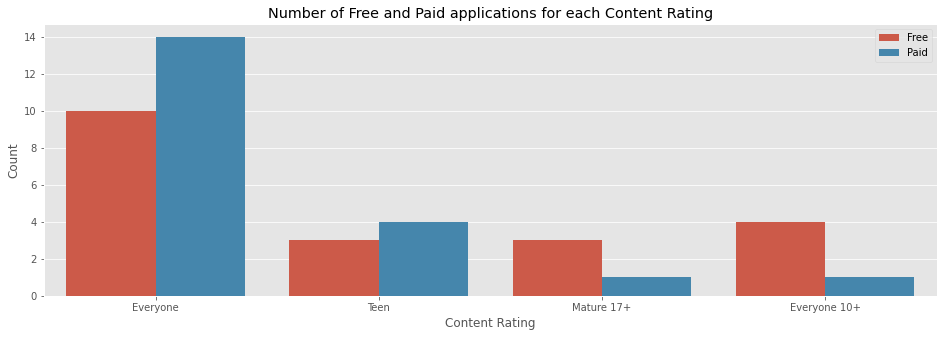

In [107]:
plt.figure(figsize=(16,5))
sns.countplot(sample2['Content Rating'], hue=sample2['Type'])
plt.title("Number of Free and Paid applications for each Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Count")
plt.legend()


In [108]:
# Test Of Independence
stat, pvalue, dof, arr = stats.chi2_contingency(table_type)
print("chi-stat :",stat)
print("p-value :",pvalue)
print("Degrees of Freedom :",dof)
print("Expected array :\n",np.round(arr))

chi-stat : 3.6095238095238096
p-value : 0.3068325875752555
Degrees of Freedom : 3
Expected array :
 [[12.  2.  2.  4.]
 [12.  2.  2.  4.]]


Since p-value > 0.05, we fail to reject Null Hypothesis.

## Thus we can conclude that the Content Rating of application is independent of application Type

In [109]:
p=pd.read_csv('../input/google-playstore-dataset/playstore.csv')
p

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,Everyone
...,...,...,...,...,...,...,...,...
1995,Bubble Shooter Space,GAME,4.2,4355,Varies with device,"1,000,000+",Free,Everyone
1996,Swamp Attack,GAME,4.4,2119235,70M,"50,000,000+",Free,Everyone 10+
1997,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,Everyone
1998,Stick War: Legacy,GAME,4.6,811040,77M,"10,000,000+",Free,Teen


In [110]:
# Central Limit Theorem
def central_limit_theorem(data,n_samples = 1000, sample_size = 500):
    """ Use this function to demonstrate Central Limit Theorem. 
        data = 1D array, or a pd.Series
        n_samples = number of samples to be created
        sample_size = size of the individual sample """
    %matplotlib inline
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    min_value = 0  # minimum index of the data
    max_value = data.count()  # maximum index of the data
    b = {}
    for i in range(n_samples):
        x = np.unique(np.random.randint(min_value, max_value, size = sample_size)) # set of random numbers with a specific size
        b[i] = data[x].mean()   # mean of each sample
    c = pd.DataFrame()
    c['sample'] = b.keys()  # sample number 
    c['Mean'] = b.values()  # mean of that particular sample
    plt.figure(figsize= (15,5))

    plt.subplot(1,2,2)
    sns.distplot(c.Mean,color='b')
    plt.title(f"Sampling Distribution. \n \u03bc = {round(c.Mean.mean(), 3)} & SE = {round(c.Mean.std(),3)}")
    plt.xlabel('data')
    plt.ylabel('freq')

    plt.subplot(1,2,1)
    sns.distplot(data,color='g')
    plt.title(f"Population Distribution. \n \u03bc = {round(data.mean(), 3)} & \u03C3 = {round(data.std(),3)}")
    plt.xlabel('data')
    plt.ylabel('freq')
    plt.show()


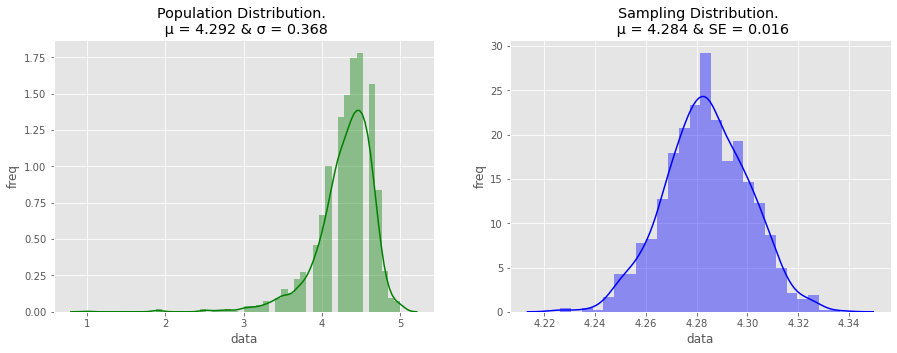

In [111]:
central_limit_theorem(p.Rating)

In [112]:
If tencent is launching a new game when will the rating of the app be above 4

SyntaxError: invalid syntax (<ipython-input-112-ca8de7fde8da>, line 1)

In [113]:
def rati(t):
  count=0
  for i in t:
     if i>=4:
       count +=1
  total_5 = count
  return float(total_5) / len(t)

t=  [np.random.uniform(0,5) for i in range(1000)]
freq = rati(t)
print(f"Frequency of ratings above 4 is {freq}")

Frequency of ratings above 4 is 0.193


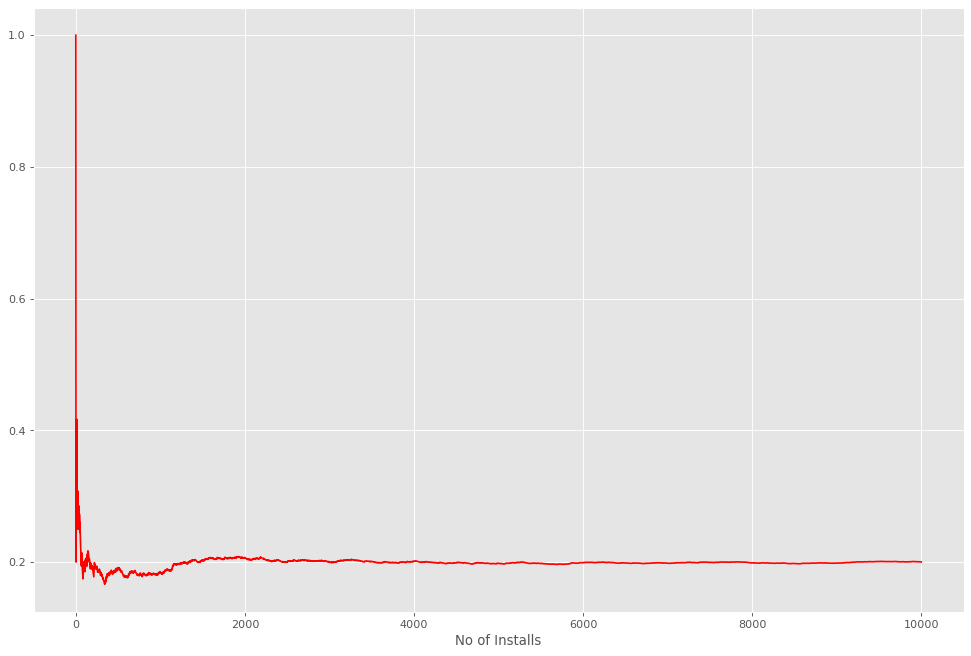

In [114]:
j=[]
f=[]
g=0
for i in range(1,10001):
    j.append(i)
    h=0
    r=np.random.choice([i for i in np.arange(0, 5.1, 0.1)] )
    if r>4:
        g=g+1
    f.append(g/i)
plt.figure(figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')  
plt.plot(f,color='r')
plt.xlabel('No of Installs')
plt.show()

**INSIGHTS**

1.After data cleaning from the descriptive statistics we can see that there are 18 different categories of apps with 1498 rows(apps) and 8 columns and Gaming category has most of the apps

2.From Hypothesis 1 its clear that the type of the app doesn’t have any influence on the rating.

3.Hypothesis 2 proved that the number of installs for paid and free apps are not the same. Tencent can concentrate on free apps if they need more installs.

4.The average rating for the categories of apps are different which can be seen from hypothesis 3. If Tencent’s aim is to have good ratings then they have to concentrate on the category of app which they are launching.

5.Hypothesis 4 shows that the content rating is independent of application type.

6.If Tencent is launching an app into the market, the rating of the app stabilizes above a rating of 4 after 2000 installs from the simulation result considering the app isn’t buggy.

